# CB0494 Mini Project
## Done by: Lew Sun Chun and Lim Junwei Darien

In this mini project, we have selected the dataset about Life Expectancy from the following Kaggle dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who

We would like to determine the best predictors to predict life expectancy using the chosen variables(percentage expenditure, BMI, GDP, Schooling) from the dataset using linear regression (both uni-variate and multivariate) and using it to predict the life expectancy. In addition,  we would like to find out how anomaly detection and removal would affect the prediction. Lastly, we would also like to find out how other categorical factors can affect life expectancy.

## Selection of variables

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [2]:
# Naming the dataset
data = 'Life Expectancy Data.csv'
# Importing the dataset from the CSV file
LEdata = pd.read_csv(data)
# Displaying the imported dataset
LEdata.columns=LEdata.columns.str.strip() #removing all the spacebars in the headings
LEdata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# Displaying information of the different variables in the dataset
LEdataInfo = LEdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Of the variables in Life Expectancy Data, we would guess that the following factors would be more impactful on the life expectancy of a person. The factors are:

Status:Developing vs Developed

percentage expenditure: Expenditure on health as a percentage of GDP per capita

GDP: GDP per capita

Schooling: Number of years of schooling

BMI: The BMI of a person

To find out whether these factors are useful in predicting the life expectancy, we would extract the dataset from these variables from the entire dataset. Note that for 'Status', the datatype is an object. Thus we will extract this data separately to do our data analysis while we extract the remaining 4 numerical variables. Also, note that for these variables there are some null entries in some of these variables as the non-null data is less than the total range of 2938 entries. Thus, we would need to remove such data later as well.

## Numerical Data Analysis

In [4]:
# Extracting the numerical variables we are interested into a subdataframe
intnumdata = pd.DataFrame(LEdata[['percentage expenditure','BMI','GDP','Schooling','Life expectancy']])
# Displaying the imported data
intnumdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   percentage expenditure  2938 non-null   float64
 1   BMI                     2904 non-null   float64
 2   GDP                     2490 non-null   float64
 3   Schooling               2775 non-null   float64
 4   Life expectancy         2928 non-null   float64
dtypes: float64(5)
memory usage: 114.9 KB


Since this dataframe contains data with null entries, we would like to clean this data to remove any data with missing information.  To do this, we will use the .dropna() syntax.

In [5]:
# Remove data entries containing null data
cleaneddata = intnumdata.dropna()
# Display the cleaned dataframe to ensure that all the null entries are removed
cleaneddata.info()
cleaneddata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2458 entries, 0 to 2937
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   percentage expenditure  2458 non-null   float64
 1   BMI                     2458 non-null   float64
 2   GDP                     2458 non-null   float64
 3   Schooling               2458 non-null   float64
 4   Life expectancy         2458 non-null   float64
dtypes: float64(5)
memory usage: 115.2 KB


,percentage expenditure,BMI,GDP,Schooling,Life expectancy
0,71.279624,19.1,584.259210,10.1,65.0
1,73.523582,18.6,612.696514,10.0,59.9
2,73.219243,18.1,631.744976,9.9,59.9
3,78.184215,17.6,669.959000,9.8,59.5
4,7.097109,17.2,63.537231,9.5,59.2


Note that Non-Null Count tallies with the total entries of 2458, suggesting that all the null entries have been removed.

Now, we can begin to analyse this dataset to find out which variables help in predicting the Life Expectancy of a person.

First, we would like to find out the correlation between all the variables with Life Expectancy. We will be plotting a pairplot to show an overview of how each variable stacks up against one another. Since we are only interested in the relationship of life expectancy against the other four variables, we will only be focusing on the last row.

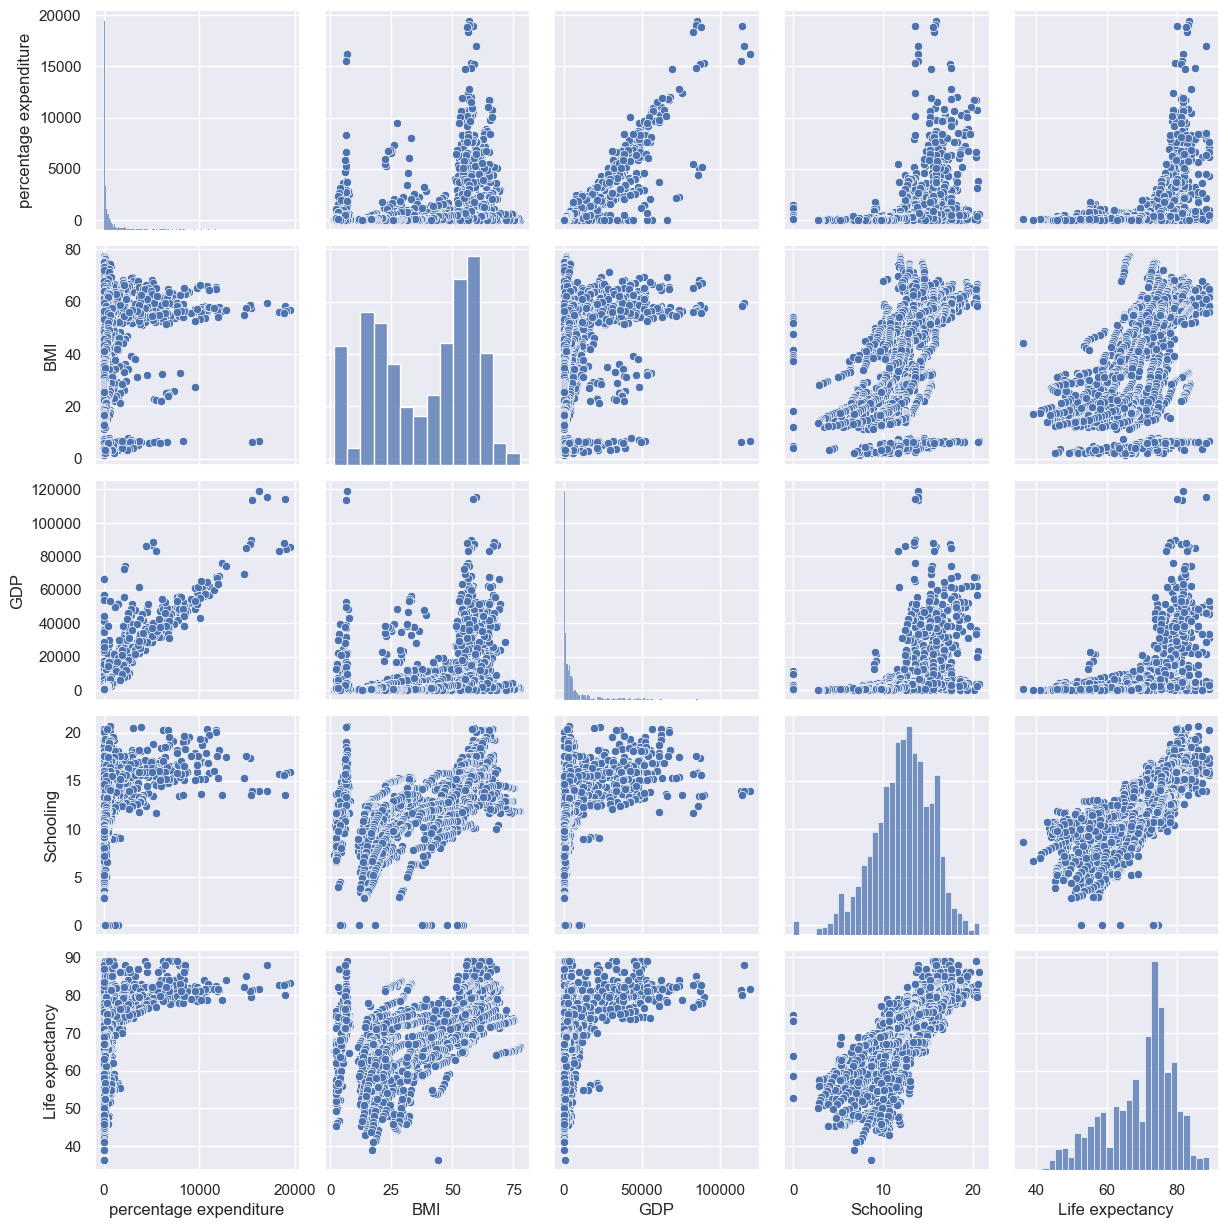

In [6]:
sb.pairplot(cleaneddata)

Based on the pairplot, we can see that the percentage expenditure and GDP have a low correlation with the life expectancy, while BMI and schooling would have much stronger correlation with the life expectancy. To visualise the data better, we would be plotting a heatmap.

In [7]:
# Calculating the correlation of between each data
cleaneddatacorr = cleaneddata.corr()
cleaneddatacorr

,percentage expenditure,BMI,GDP,Schooling,Life expectancy
percentage expenditure,1.000000,0.251999,0.899212,0.402715,0.406892
BMI,0.251999,1.000000,0.304136,0.571642,0.578197
GDP,0.899212,0.304136,1.000000,0.451525,0.459858
Schooling,0.402715,0.571642,0.451525,1.000000,0.754503
Life expectancy,0.406892,0.578197,0.459858,0.754503,1.000000


<AxesSubplot:>

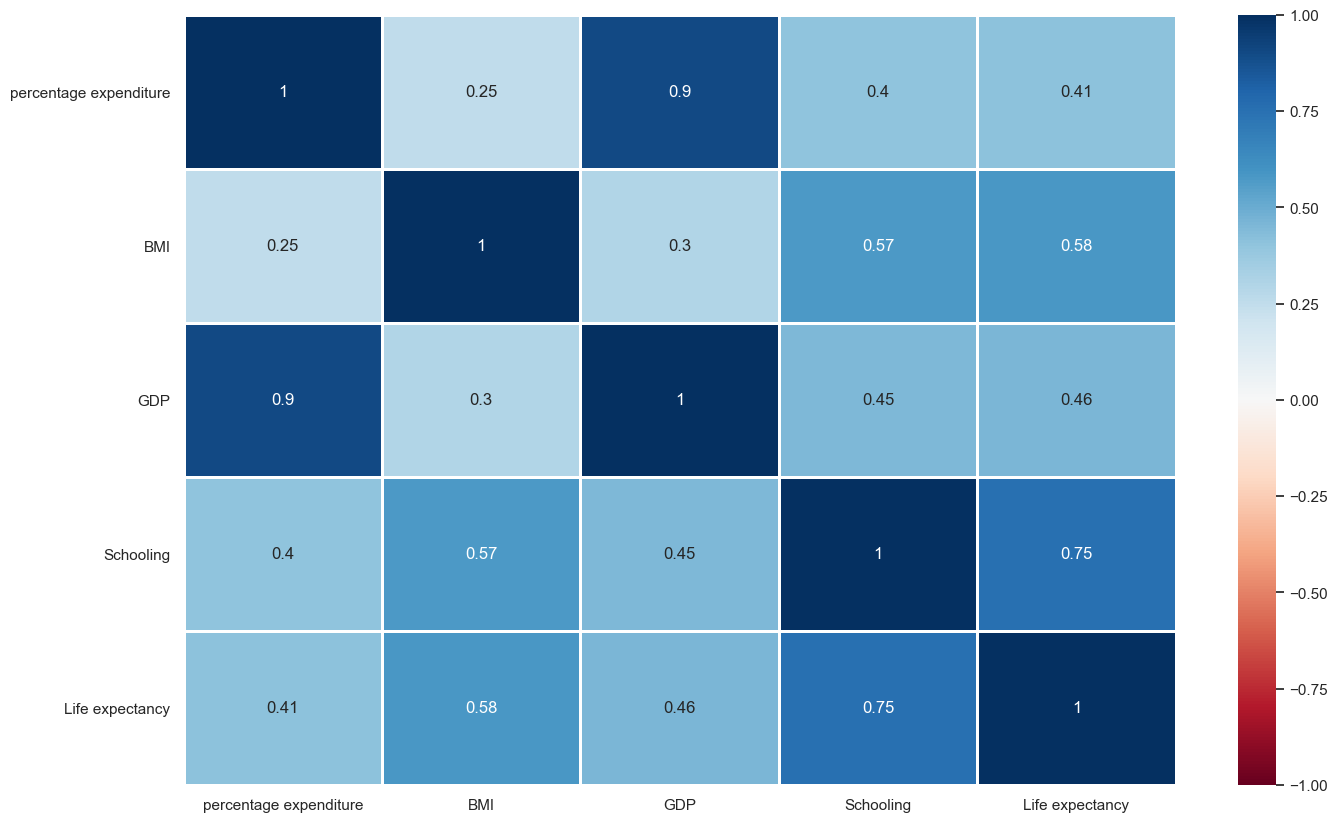

In [8]:
f = plt.figure(figsize = (16,10))
# Plotting the correlation heatmap to visualise the correlation matrix
sb.heatmap(cleaneddatacorr, vmin = -1, vmax = 1, linewidths = 1,
          annot = True, cmap = 'RdBu' )

Evidently, the Schooling and BMI has a higher corelation coefficient than percentage expenditure and GDP. We define the correlation value of 0.5 and below to be low correlation against life expectancy. Thus, according to the heatmap, Percentage expenditure and gdp should be excluded, as they have low correlation with life expectancy. 

<AxesSubplot:>

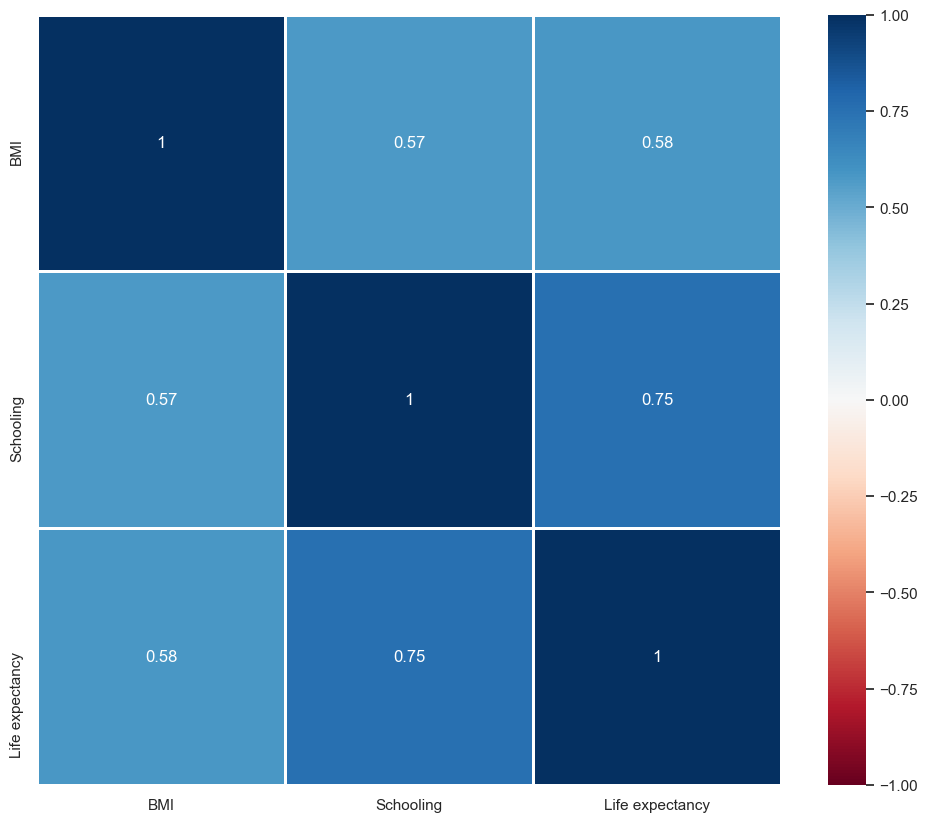

In [9]:
numdata=cleaneddata.drop(['percentage expenditure','GDP'],axis=1)
numdatacorr = numdata.corr()

f = plt.figure(figsize = (12,10))
# Plotting the correlation heatmap to visualise the correlation matrix
sb.heatmap(numdatacorr, vmin = -1, vmax = 1, linewidths = 1,
          annot = True, cmap = 'RdBu' )

### Anomaly Detection and Removal

For the numerical data, we would like to locate and remove the anormalies before doing further analysis so that these anomalies will not influence the results of our analysis. We will be doing Isolation Forest anomaly detection instead of LOF as it is computationally faster and we would like to remove global outliers instead of local outliers. To do the Isolation Forest, we would be using the Isolation Forest module from **pyod** instead of **sklearn** as it is unable to perform anomaly detection for multivariate model. pyod can be installed by using `pip install pyod`.

In [10]:
# Creating a list of interested variables for the for loop
intvar=['BMI','Schooling']

In [11]:
# Creating an empty dictionary to store subdataframe for each dataset
Subdata = {}

In [12]:
# Creating an empty dictionary to store subdataframe for each dataset after anomaly removal
SubdataNA={}

# Import isolation forest from pyod.models.iforest
from pyod.models.iforest import IForest

# Set the Parameters for decision tree to be used in isolation forest
num_estimators = 200   # Number of decision trees
cont_fraction = 0.1 # Fraction of Anomalies (max 0.5)

# Create Anomaly Detection Model using IsolationForest
IForest=IForest(n_estimators=num_estimators, contamination = cont_fraction, random_state=0)

In [14]:
# Defining a function for the for loop
def anomalyremoval(var) :
    # Creating subdata
    Subdata[var] = pd.DataFrame(cleaneddata[['Life expectancy',var]])
    
    #fit the isolation forest
    labels = IForest.fit_predict(Subdata[var])
    
#plot scatter for subdata
    print('Graph 1: Scatterplot of' , 'Life expectancy' ,'against',  var )
    f,axes = plt.subplots(1,3, figsize=(24,8))
    axes[0].scatter(x = var, y = 'Life expectancy', data = Subdata[var])
    
    
#Add anomaly column
    Subdata_labeled = Subdata[var].copy()
    Subdata_labeled["Anomaly"] = pd.Categorical(labels)
    
# Visualising the anomalies in the scatterplot
    print('Graph 2: Visualising anomalies of ' , 'Life expectancy' , 'against' ,  var )
    f = plt.figure(figsize=(16,8))
    axes[1].scatter(x = var, y = 'Life expectancy', c = "Anomaly", cmap = 'viridis', data = Subdata_labeled)
    
#Remove anomalies from the Subdata_labeled dataframe
#The binary labels of the training data. 0 stands for inliers and 1 for outliers/anomalies.
    noanomaly=Subdata_labeled[Subdata_labeled.Anomaly !=1]
    
#Storing Subdata after anomaly removal in a dataframe 
    SubdataNA[var]=noanomaly.copy()
    
#Plot scatterplot after removal of anomaly
    print('Graph 3: Scatterplot of ' , 'Life expectancy' ,'against',  var, 'after anomaly removal' )
    f = plt.figure(figsize=(16,8))
    axes[2].scatter(x = var, y = 'Life expectancy', data = noanomaly) 
    plt.show()

# Printing the correlation matrix
    noanomalycorr = noanomaly.corr()
    print(noanomalycorr)
    print()
    
# Returning the corelation coefficient so that we can use this data for later
    return noanomalycorr.iloc[0,1]

In [15]:
# Defining new list to store correlation coefficient
no_anomalycorr = []

# For loop
for x in intvar:
    k=anomalyremoval(x)
    no_anomalycorr.append(k)

print('Correlation results aft removal of anomaly:', no_anomalycorr)

NameError: name 'IForest' is not defined

In [ ]:
# Extracting correlation coefficients of data with anomaly
anomaly_corr = pd.DataFrame(numdatacorr['Life expectancy'])
anomaly_corr=anomaly_corr.drop(['Life expectancy'], axis = 0)
CorrCompare=anomaly_corr.rename(columns={'Life expectancy': 'Anomaly'})
CorrCompare

In [ ]:
# Adding 'No anomaly' column to the correlation comparison datafram
CorrCompare['No Anomaly']= no_anomalycorr
# Sorting correlation data
CorrCompare.sort_values(by = ['Anomaly'], inplace = True)
CorrCompare

In [ ]:
#Plotting the bar chart to compare correlation coefficient values before and after anomaly removal
CorrCompare.plot(kind='bar')
plt.xticks(rotation=0)

From the bar chart, we have determined that the correlation coefficient does improve the coefficient by a little. However, the results vary differently for the different variables. The correlation coefficient of BMI improved much greater than Schooling. To confirm the reliability of it, we would like to do a linear regression with and without anomaly. 

### Linear regression

After obtaining the corelation coefficients of how each variable correlates to the Life Expectancy data as well as how anomaly , we would like to predict the life expectancy with each variable, as well as with multivariables. Furthermore, to confirm whether the decision to drop the "percentage expenditure" and "GDP" variables was right, we are doing multivariate linear regression with and without these two variables to compare the scores.



In [16]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#### Linear Regression with anomaly

In [17]:
def linearregression(b):
    life_expect1= pd.DataFrame(cleaneddata['Life expectancy'])
    life_predictor1 = pd.DataFrame(cleaneddata[b])
    
# Split the dataset into Train and Test       
    life_predictor_train = pd.DataFrame(life_predictor1[:1843])
    life_predictor_test  = pd.DataFrame(life_predictor1[-615:])
    life_expect_train = pd.DataFrame(life_expect1[:1843])
    life_expect_test  = pd.DataFrame(life_expect1[-615:])

# Create a Linear Regression object
    linreg = LinearRegression()

# Train the Linear Regression model
    linreg.fit(life_predictor_train,life_expect_train)

#R^2 values of train and test set
    A=linreg.score(life_predictor_train, life_expect_train)
    B=linreg.score(life_predictor_test, life_expect_test)
    
    global R2_Tables # To call the variable outside of the function
    R2_Tables=pd.DataFrame([],columns=['Predictor','Train','Test'])
    
# For uni-variate linear regression
    if b == ['BMI']:
        R2_Tables.loc[0,'Predictor']= 'BMI'
    elif b == ['Schooling']:
        
# For multivariate linear regression
        R2_Tables.loc[0,'Predictor']= 'Schooling'
    elif len(b)==2:
        R2_Tables.loc[0,'Predictor']='Multivariate_2'
    elif len(b)==4 :
        R2_Tables.loc[0,'Predictor']='Multivariate_4'
        
# Inserting R^2 values into R2_Tables
    R2_Tables.loc[0,'Train'] = A
    R2_Tables.loc[0,'Test']=B

In [18]:
# Obtaining the R^2 values the dataframe using the defined function for linear regression with anomaly
R2_Table=pd.DataFrame([])
linearregression(['BMI'])
R2_Table=R2_Table.append(R2_Tables)
linearregression(['Schooling'])
R2_Table=R2_Table.append(R2_Tables)
linearregression(['BMI','Schooling'])
R2_Table=R2_Table.append(R2_Tables)
linearregression(['BMI','Schooling','GDP','percentage expenditure'])
R2_Table=R2_Table.append(R2_Tables)
R2_Table=R2_Table.reset_index(drop=True)
R2_Table.style.set_table_attributes("style='display:inline'").set_caption('Goodness of fit')


C:\Users\Darie\AppData\Local\Temp\ipykernel_30432\275857767.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R2_Table=R2_Table.append(R2_Tables)
C:\Users\Darie\AppData\Local\Temp\ipykernel_30432\275857767.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R2_Table=R2_Table.append(R2_Tables)
C:\Users\Darie\AppData\Local\Temp\ipykernel_30432\275857767.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R2_Table=R2_Table.append(R2_Tables)
C:\Users\Darie\AppData\Local\Temp\ipykernel_30432\275857767.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  R2_Table=R2_Table.append(R2_Tables)


,Predictor,Train,Test
0,BMI,0.359395,0.249732
1,Schooling,0.601982,0.460856
2,Multivariate_2,0.631607,0.500902
3,Multivariate_4,0.641891,0.528135


#### Linear Regression without anomaly
For linear regression without anomaly, since we have 2458 entries, and we have set our fraction of anomalies to 0.1, we would have a total of 2212 entries after removing anomalies. As such, the train and test split have different number of entries as the regression with anomaly.

In [19]:
def linearregressionNA(b) :
    #creating subdata
    Subdata1 = pd.DataFrame(cleaneddata['Life expectancy'])
    #cleaneddata.info()
    Subdata2=pd.DataFrame(cleaneddata[b])
    Subdata=Subdata1.join(Subdata2,rsuffix='_right')
    Subdata.head()
    
#fit the isolation forest
    labels1 = IForest.fit_predict(Subdata)
    
#Add anomaly column
    Subdata_labeled1 = Subdata.copy()
    Subdata_labeled1["Anomaly"] = pd.Categorical(labels1)
    
# Removes entries of anomaly
    noanomaly=Subdata_labeled1[Subdata_labeled1.Anomaly !=1]

    
    life_expect2 = pd.DataFrame(noanomaly['Life expectancy'])
    life_predictor3 = pd.DataFrame(noanomaly[b])

# Split the dataset into Train and Test       
    life_predictor_train3 = pd.DataFrame(life_predictor3[:1659])
    life_predictor_test3  = pd.DataFrame(life_predictor3[-553:])
    life_expect_train2 = pd.DataFrame(life_expect2[:1659])
    life_expect_test2  = pd.DataFrame(life_expect2[-553:])

# Create a Linear Regression object
    linreg = LinearRegression()

# Train the Linear Regression model
    linreg.fit(life_predictor_train3,life_expect_train2)
    
# Calculating R^2 values of train and test set
    A=linreg.score(life_predictor_train3, life_expect_train2)
    B=linreg.score(life_predictor_test3, life_expect_test2)
    
    global R2_Tables1 # To call the variable outside of the function
    R2_Tables1=pd.DataFrame([],columns=['Predictor_NA','Train_NA','Test_NA'])
    if b == ['BMI']:
        R2_Tables1.loc[0,'Predictor_NA']= 'BMI_NA'
    elif b == ['Schooling']:
        R2_Tables1.loc[0,'Predictor_NA']= 'Schooling_NA'
    elif len(b)==2:
        R2_Tables1.loc[0,'Predictor_NA']='Multivariables_2_NA'
    elif len(b)==4 :
        R2_Tables1.loc[0,'Predictor_NA']='Multivariables_4_NA'

# Inserting R^2 values into R2_Tables
    R2_Tables1.loc[0,'Train_NA'] = A
    R2_Tables1.loc[0,'Test_NA']=B

In [20]:
# Obtaining the R^2 values the dataframe using the defined function for linear regression without anomaly
R2_Table_NA=pd.DataFrame([])
linearregressionNA(['BMI'])
R2_Table_NA=R2_Table_NA.append(R2_Tables1)
linearregressionNA(['Schooling'])
R2_Table_NA=R2_Table_NA.append(R2_Tables1)
linearregressionNA(['BMI','Schooling'])
R2_Table_NA=R2_Table_NA.append(R2_Tables1)
linearregressionNA(['BMI','Schooling','GDP','percentage expenditure'])
R2_Table_NA=R2_Table_NA.append(R2_Tables1)
R2_Table_NA=R2_Table_NA.reset_index(drop=True)
R2_Table_NA.style.set_table_attributes("style='display:inline'").set_caption('Goodness of fit')

NameError: name 'IForest' is not defined

In [ ]:
# Obtaining the combined R^2 dataset
R2_Table_Combined = R2_Table.join(R2_Table_NA[['Train_NA', 'Test_NA']], rsuffix='_right')
R2_Table_Combined = R2_Table_Combined.set_index('Predictor')
R2_Table_Combined

In [ ]:
# Changing dtype of R2_Table_Combined to float64
R2_Table_Combined = R2_Table_Combined.astype(float)

In [ ]:
#Plotting Heat Map for better visualisation
f = plt.figure(figsize = (12,10))
# Plotting the correlation heatmap to visualise the correlation matrix
sb.heatmap(R2_Table_Combined, vmin = -1, vmax = 1, linewidths = 1,
          annot = True, cmap = 'RdBu' )

In [ ]:
# Obaining R^2 dataset for Train set for the barchart
R2_Table_Train = pd.DataFrame(R2_Table_Combined[['Train', 'Train_NA']])
R2_Table_Train

In [ ]:
# Obaining R2 dataset for Train set for the bar chart
R2_Table_Test = pd.DataFrame(R2_Table_Combined[['Test', 'Test_NA']])
R2_Table_Test

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(24, 12))
#Results of R2 score for training data set show on first row
R2_Table_Train.plot(kind='bar', ax = axes[0])
#Results of R2 score for test data set show on second row
R2_Table_Test.plot(kind='bar', ax = axes[1])
# For adjustments in fontsize, legend, rotation of xticks
for ax in f.axes: 
    plt.sca(ax) 
    plt.xticks(rotation=0)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    plt.xlabel('Predictor',fontsize=16, fontweight='bold')
    plt.ylabel('R2_Score',fontsize=16, fontweight='bold')
    plt.legend(fontsize=16)

From the bar charts, we can identify that Schooling is the best variable for predicting the Life Expectancy as it has the highest R^2 value. We can also conclude that using a multivariate model helps to predict the life expectancy slightly better, although the improvement over the best performing variable might not be very significant. We also found that the two variables we have dropped were indeed justified since the R^2 values of multivariate_2 and Multivariate_4 are almost the same, suggesting that the variables 'percentage expenditure' and 'GDP' are not good at predicting Life expectancy. Lastly, we found that removing the anomaly would not provide us with a better result since the R^2 score with and without anomaly are similar. Therefore, it is not recommended to remove the anomaly when doing the regression especially since these anomaly are also part of the dataset and should be kept in.

## Bivariate comparison using categorical variables.

After performing regrssion on the numerical data, we would like to see how the categorical variables can also predict the life expectancy. In this section, we would like to see how the status of the country, as well as the continent where it is from can affect the life expectancy.

Since we only have the status of the countries as an object datatype, we would like to explore further how we can use other variables to predict the life expectancy. As such, we have decided to encode each country with its respective continents to show the life expectancies of each continent. To do so, we would require the pycountry module and it could be installed using `pip install pycountry-convert`.  


In [ ]:
#extract country data to convert to countinent
#Tutorial Url='https://www.youtube.com/watch?v=VMIRK36d-EY&ab_channel=Math%26PythonBasics'
import pycountry_convert as pc
pd.set_option('display.max_rows',None)

intobjdata=pd.DataFrame(LEdata[['Life expectancy','Country','Status']])
LE1data=intobjdata.dropna() #removes null value
LE1data.info()

In [ ]:
# Obtaining a new column for each country's continent using pycountry_convert

PreCatdata= pd.DataFrame(LE1data['Country'])

#Changing name of countries that the pycountry_convert function can recognise 
PreCatdata.at[304:319,'Country']= 'Bolivia'
PreCatdata.at[1218:1233,'Country']='Iran'
PreCatdata.at[1699:1714,'Country']='Federated States of Micronesia'
PreCatdata.at[2087:2102,'Country']='South Korea'
PreCatdata.at[2585:2600,'Country']='North Macedonia'
PreCatdata.at[2858:2873,'Country']='Bolivarian Republic of Venezuela'

def convert(row):
# Convert country name to country code
    cn_code=pc.country_name_to_country_alpha2(row.Country,cn_name_format='default')
# Convert country code to continent code.
    if 'TL'== cn_code:
        conti_code='AS'
    else:
        conti_code=pc.country_alpha2_to_continent_code(cn_code)
    return conti_code

# Adds another column into the dataframe
PreCatdata['continent']=PreCatdata.apply(convert,axis=1)

conti_names={"AS":"Asia","SA":"South America",
             "OC":"Oceania","EU":"Europe","NA":"North America","AF":"Africa"}
# Add Continent Column to PreCatdata
PreCatdata['Continent']=PreCatdata['continent'].map(conti_names)
# Add Country Status Column to PreCatdata
PreCatdata['Country Status']=LE1data[['Status']]
# Add Life Expectancy Column to PreCatdata
PreCatdata['Life expectancy']=LE1data[['Life expectancy']]
PreCatdata.head()

In [ ]:
# Changing 'object' dtype into 'categorical'
for col in ['Country', 'continent', 'Continent', 'Country Status']:
    PreCatdata[col] = PreCatdata[col].astype('category')
Catdata = PreCatdata
Catdata.info()

In [ ]:
# Using plotly for better graphical visualisation
import plotly.offline as py #offline, using plotly offline
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.colors import n_colors

In [ ]:
# Using plotly to plot the violin plots for life expectancy against each continent

Catdata1=Catdata.copy()

# Setting every continent as one data set
Catdata1.set_index('continent',inplace=True)
data1=Catdata1.loc[['AS']]
data2=Catdata1.loc[['SA']]
data3=Catdata1.loc[['OC']]
data4=Catdata1.loc[['EU']]
data5=Catdata1.loc[['NA']]
data6=Catdata1.loc[['AF']]

# Plotting the violin plots individually
Africa=go.Violin(y=data6['Life expectancy'],x=data6['Continent'],box_visible=True,name='Africa')
Oceania=go.Violin(y=data3['Life expectancy'],x=data3['Continent'],box_visible=True,name='Oceania')
Asia=go.Violin(y=data1['Life expectancy'],x=data1['Continent'],box_visible=True,name='Asia')
South_America=go.Violin(y=data2['Life expectancy'],x=data2['Continent'],box_visible=True,name='South America')
North_America=go.Violin(y=data5['Life expectancy'],x=data5['Continent'],box_visible=True,name='North America')
Europe=go.Violin(y=data4['Life expectancy'],x=data4['Continent'],box_visible=True,name='Europe')

# Plotting each violin plot based on ascending median life expectancy
data=[Africa,Oceania,Asia,South_America,North_America,Europe]
fig=go.Figure(data)
fig.show()


From the violin plots, it is evident that the continents affect the life expectancy. Europe has the longest life expectancy while africa has the shortest based on the median life expectancy. All continents have simliar ranges of life expectancies except Africa, where its life expectancy is much lower than the rest.  

In [ ]:
# Using plotly to plot the box plots for life expectancy against country status

Catdata2=Catdata.copy()
Catdata2.set_index('Country Status',inplace=True)

# Extracting Developing and Developed dataset for plotly plotting
data7=Catdata2.loc[['Developing']]
data7=data7.reset_index()
data8=Catdata2.loc['Developed']
data8=data8.reset_index()

# Plotting the boxplots using plotly
Developing=go.Box(y=data7['Life expectancy'],x=data7['Country Status'],name='Developing')
Developed=go.Box(y=data8['Life expectancy'],x=data8['Country Status'],name='Developed')
data9=[Developing,Developed]
fig=go.Figure(data9)
fig.show()


From the box plots, the status of a country has an impact on life expectancy since the 'Developed' status as a whole is higher than that of 'Developing'. Countries that are 'Developed' do have a greater life expectancy than countries that are 'Developing' in general. 